In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import morphology as morp

### Ex: Coins at the boundary

In [2]:
img1 = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
kernel = morp.disk(9,dtype='uint8')
erosion1 = cv2.erode(img1,kernel,iterations = 1)
erosion1[10:erosion1.shape[0]-10, 10:erosion1.shape[1]-10]=0
final= cv2.dilate(erosion1, kernel)
# cv2.imshow("yolo", np.hstack([img1, erosion1, final]))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### Ex: Non Overlapping Coins and Overlapping Coins

In [3]:
I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)


kernel = morp.disk(12,dtype='int')
for i in range(len(kernel)):
    for j in range(len(kernel[i])):
        if(i==0 or i==len(kernel)-1 or j==0 or j==len(kernel)-1):
            kernel[i][j]=-1
        if(kernel[i][j]==1 and( i!=12 or j!=12)):
            kernel[i][j]=0






output_image = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)

kernel = morp.disk(12,np.uint8)

flag=np.zeros((erosion1.shape[0],erosion1.shape[1]))
count=0


for i in range(len(output_image)):
    for j in range(len(output_image[i])):
        if output_image[i][j]==255:
            if(flag[i][j]==0):
                count+=1
            for k in range(max(0,i-11),min(len(output_image),i+11)):
                for l in range(max(0,j-11),min(len(output_image[i]),j+11)):
                    flag[k][l]=1
print("Number of coins non-overlapping =",count,"\n")



dilation = cv2.dilate(output_image,kernel,iterations = 1)
I2=I-dilation



erosion = cv2.erode(I2,morp.disk(10,np.uint8),iterations = 1)

flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0
for i in range(len(erosion)):
    for j in range(len(erosion[i])):
        if erosion[i][j]==255:
            if(flag[i][j]==0):
                count+=1
            for k in range(max(0,i-11),min(len(erosion),i+11)):
                for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
                    flag[k][l]=1
print("Number of coins overlapping =",count,"\n")


cv2.imshow("asdfasd", np.hstack([I,dilation,I2]))
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of coins non-overlapping = 62 

Number of coins overlapping = 174 



### objects.png 

### Text2.png 

25
28
75
200
33


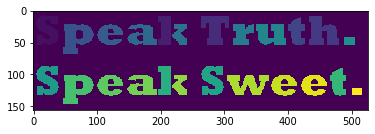

In [4]:
img31 = cv2.imread('red_text.png', cv2.IMREAD_GRAYSCALE)
img32 = cv2.imread('blue_text.png', cv2.IMREAD_GRAYSCALE)
img33 = cv2.imread('green_text.png', cv2.IMREAD_GRAYSCALE)
img34 = cv2.imread('black_text.png', cv2.IMREAD_GRAYSCALE)
img35 = cv2.imread('purple_text.png', cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(img31,127,255,cv2.THRESH_BINARY_INV)
ret,thresh2 = cv2.threshold(img32,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img33,127,255,cv2.THRESH_BINARY_INV)
ret,thresh4 = cv2.threshold(img34,127,255,cv2.THRESH_BINARY_INV)
ret,thresh5 = cv2.threshold(img35,127,255,cv2.THRESH_BINARY_INV)
num_labels1, labels_im1 = cv2.connectedComponents(thresh1)
num_labels2, labels_im2 = cv2.connectedComponents(thresh2)
num_labels3, labels_im3 = cv2.connectedComponents(thresh3)
num_labels4, labels_im4 = cv2.connectedComponents(thresh4)
num_labels5, labels_im5 = cv2.connectedComponents(thresh5)
plt.imshow(labels_im1)
print(num_labels1)
print(num_labels2)
print(num_labels3)
print(num_labels4)
print(num_labels5)


### Chroma Keying

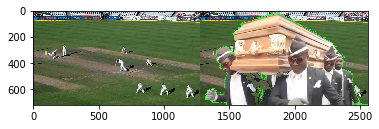

In [5]:
img5 = cv2.imread('chroma_key.jpg', cv2.IMREAD_UNCHANGED)
img6 = cv2.imread('stadium.jpg', cv2.IMREAD_UNCHANGED)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
array = np.array([-2, -1, 0, 1, 2])
green = np.array([17, 255, 35])
bigBroArray=[]
for i in range(len(array)):
    for j in range(len(array)):
        for k in range(len(array)):
                bigBroArray.append([green[2]+array[i],green[2]+array[j], green[2]+array[k]])
bigBroArray = np.asarray(bigBroArray)
# print(img5)
# print(img6.shape)
for i in range(img5.shape[0]):
    for j in range(img5.shape[1]):
        if (img5[i, j] in bigBroArray):
            img5[i, j] = img6[i, j]
plt.imshow( np.hstack([img6, img5]))
            


### Affine Tranformations

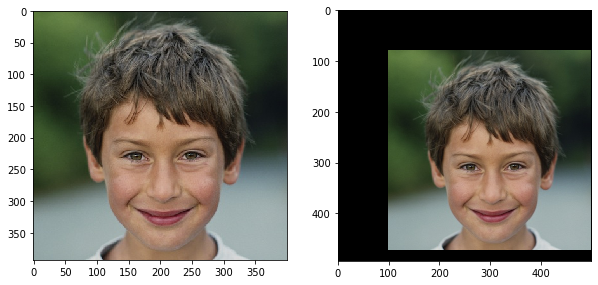

In [6]:
img7=cv2.imread('boy_smiling.jpg', cv2.IMREAD_UNCHANGED)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
height, width, channels = img7.shape
tX = height/4
tY = height/5
T= np.float32([[1, 0, tX], [0, 1, tY]])
imgTranslate = cv2.warpAffine(img7, T, (width+100, height+100))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(img7)
ax2.imshow(imgTranslate)
plt.show()

### Face Alignment

[-1.  0.]
[ 0.71019454 -0.70400548]
-0.7101945394028985


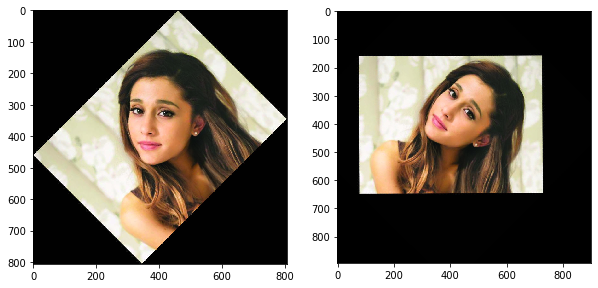

In [7]:
img9 = cv2.imread('aligned_face.jpg', cv2.IMREAD_UNCHANGED)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
left_eye = np.asarray([341, 325])
right_eye = np.asarray([423, 325])
leftH = np.asarray([346, 804])
rightH = np.asarray([805, 349])
horVec=rightH-leftH
eyeVec =left_eye-right_eye
eyeVec = (eyeVec)/np.sqrt(eyeVec[0]*eyeVec[0]+eyeVec[1]*eyeVec[1])
print(eyeVec)
horVec=(horVec)/np.sqrt(horVec[0]*horVec[0]+horVec[1]*horVec[1])
print(horVec)
costheta=np.dot(eyeVec, horVec)
print(costheta)
angleinRad=np.arccos(costheta)
angleindeg = angleinRad*(180/np.pi)
M1=cv2.getRotationMatrix2D((img9.shape[1]/2, img9.shape[0]/2), 180+angleindeg, 1)
im_rot = cv2.warpAffine(img9, M1, (width+500, height+500))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(img9)
ax2.imshow(im_rot)
plt.show()
# cv2.imshow("yolo", img9)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Perspective Transformation

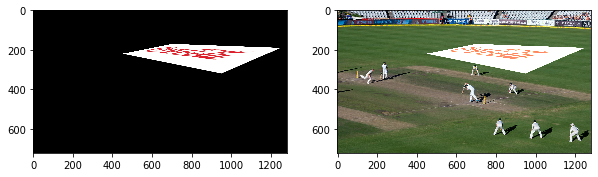

In [8]:
### Homography
img10 = cv2.imread('coca.jpg', cv2.IMREAD_UNCHANGED)
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
img11 = cv2.imread('stadium.jpg', cv2.IMREAD_UNCHANGED)
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[700,170],[450, 220],[1250, 190],[950, 320]])# stadium coords
M, status = cv2.findHomography(pts1, pts2)
coke_cgd = cv2.warpPerspective(img10, M, (img11.shape[1], img11.shape[0]))
final=cv2.add(img11,coke_cgd)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(coke_cgd)
ax2.imshow(final)
plt.show()